## Imports

In [1]:
import numpy as np # Array manipulation
import matplotlib.pyplot as plt #plotting
import random #Generating random numbers
import math #Getting the value of e
import time #Testing purposes
from tqdm import tqdm #For progress bar
import seaborn as sns

## Initializing Proteins (lines)

In [2]:
# l1, l2, l3, l4, l5 and l6 are dictionaries corresponding to corrdinates 
# of residues for that protien.
# Keys(1,2,3,4) are used to keep track of the type of residue

def reset():
    
    l1 = {
        1 : [5,17],
        2 : [5,18],
        3 : [5,19],
        4 : [5,20]
    }

    l2 = {
        1 : [15,17],
        2 : [15,18],
        3 : [15,19],
        4 : [15,20]
    }

    l3 = {
        1 : [25,17],
        2 : [25,18],
        3 : [25,19],
        4 : [25,20]
    }

    l4 = {
        1 : [35,17],
        2 : [35,18],
        3 : [35,19],
        4 : [35,20]
    }

    l5 = {
        1 : [17,30],
        2 : [18,30],
        3 : [19,30],
        4 : [20,30]
    }

    l6 = {
        1 : [17,6],
        2 : [18,6],
        3 : [19,6],
        4 : [20,6]
    }

    lines = { 1 : l1,
              2 : l2,
              3 : l3,
              4 : l4,
              5 : l5,
              6 : l6}
    return lines
lines = reset()

## Find possible coordinates of the space for the residue to move into, and choosing one at random

In [3]:
# Alogrithm used:
# 1. Choose a line and then a point from that line at random
# 2. Check the position of that point. Positions 1,4 can undergo end moves; 2,3 can undergo corner moves.
# 3a. For end moves, compute all points at a distance sqrt(2) from the chosen residue, check if that space is empty and if the bond distance is maintained
# 3b. For corner moves, compute all points at a distance sqrt(2) from the chosen residue, check if that space is empty and if the bond distance is maintained
# 3c. Store the availble spaces in an array
# 4. Choose a point (var new_point) at random from the availble spaces, and return it. 

def choose_point(lines):
    
    line_pos = np.random.randint(1,7)   
    rand_line = lines[line_pos]
    point_pos = np.random.randint(1,5)
    rand_point = rand_line[point_pos]
    
    current_points = [list(line.values()) for line in list(lines.values())]
    current_points = [current_points[i][j] for i in range(6) for j in range(4)]


    available_points = []
    new_current_points = []
    new_lines = {}
    
    if point_pos == 4:
        available_points = [[rand_point[0] + 1,rand_point[1] + 1],
                   [rand_point[0] - 1,rand_point[1] - 1],
                   [rand_point[0] + 1,rand_point[1] - 1],
                   [rand_point[0] - 1,rand_point[1] + 1]]
        point3 = rand_line[3]
        available_points = [point for point in available_points if (point not in current_points and (abs(sum((np.array(point3) - np.array(point))**2)) == 1) and (point[0]<40 and point[0]>0 and point[1]<40 and point[1]>0))]

    if point_pos == 1:
        available_points = [[rand_point[0] + 1,rand_point[1] + 1],
                   [rand_point[0] - 1,rand_point[1] - 1],
                   [rand_point[0] + 1,rand_point[1] - 1],
                   [rand_point[0] - 1,rand_point[1] + 1]]
        point2 = rand_line[2]
        available_points = [point for point in available_points if (point not in current_points and (abs(sum((np.array(point2) - np.array(point))**2)) == 1) and (point[0]<40 and point[0]>0 and point[1]<40 and point[1]>0))]

    if point_pos == 3: 
        available_points = [[rand_point[0] + 1,rand_point[1] + 1],
                   [rand_point[0] - 1,rand_point[1] - 1],
                   [rand_point[0] + 1,rand_point[1] - 1],
                   [rand_point[0] - 1,rand_point[1] + 1]]
        point2 = rand_line[2]
        point4 = rand_line[4]
        available_points = [point for point in available_points if (point not in current_points and (abs(sum((np.array(point2) - np.array(point))**2)) == 1) and (abs(sum((np.array(point4) - np.array(point))**2)) == 1) and (point[0]<40 and point[0]>0 and point[1]<40 and point[1]>0))]
    if point_pos == 2:
        available_points = [[rand_point[0] + 1,rand_point[1] + 1],
                   [rand_point[0] - 1,rand_point[1] - 1],
                   [rand_point[0] + 1,rand_point[1] - 1],
                   [rand_point[0] - 1,rand_point[1] + 1]]
        point3 = rand_line[3]
        point1 = rand_line[1]
        available_points = [point for point in available_points if (point not in current_points and (abs(sum((np.array(point3) - np.array(point))**2)) == 1) and (abs(sum((np.array(point1) - np.array(point))**2)) == 1) and (point[0]<40 and point[0]>0 and point[1]<40 and point[1]>0))]

    if (available_points != []):
        new_point = random.choice(available_points)
        new_current_points = [i for i in current_points]
        i = 4 * (line_pos - 1) + point_pos - 1
        new_current_points[i] = new_point

        new_point = random.choice(available_points)
        new_current_points = [i for i in current_points]
        i = 4 * (line_pos - 1) + point_pos - 1
        new_current_points[i] = new_point

        l1_new = {key + 1 : point for key,point in enumerate(new_current_points[:4]) }
        l2_new = {key + 1 : point for key,point in enumerate(new_current_points[4:8]) }
        l3_new = {key + 1 : point for key,point in enumerate(new_current_points[8:12]) }
        l4_new = {key + 1 : point for key,point in enumerate(new_current_points[12:16]) }
        l5_new = {key + 1 : point for key,point in enumerate(new_current_points[16:20]) }
        l6_new = {key + 1 : point for key,point in enumerate(new_current_points[20:24]) }

        new_lines = {1 : l1_new,
                    2 : l2_new,
                    3 : l3_new,
                    4 : l4_new,
                    5 : l5_new,
                    6 : l6_new}
    
    return new_lines

## Calculate Energy

When A-A, B-B, C-C, D-D interatctions are allowed

In [4]:
# Algorithm:
# 1. Find the pairwise distance between all A residues, all B residues and so on
# 2. Count the number of instance where the above distance in 1, and divide it by 2 (as we are couting them twice)
# 3. Multiply the above counter by a negative integer k, denoting the interaction energy between residues of the same kind

def energy(lines,k):
    A = [l[1] for l in lines.values()]
    B = [l[2] for l in lines.values()]
    C = [l[3] for l in lines.values()]
    D = [l[4] for l in lines.values()]
    energy = 0
    for l in [A,B,C,D]:
        energy += k*[(i[0] - j[0])**2 + (i[1] - j[1])**2 for i in l for j in l].count(1)

    return energy/2
    

When any bead of one molecule can interract with any bead of another molecule

In [5]:
def energy(lines,k):
    
    all_points = [list(line.values()) for line in list(lines.values())]
    all_points = [all_points[i][j] for i in range(6) for j in range(4)]
    
    internal = [(lines[i][1][0] - lines[i][4][0])**2 + (lines[i][1][1] - lines[i][4][1])**2 for i in range(1,7)].count(1)
    
    energy = k*([(i[0] - j[0])**2 + (i[1] - j[1])**2 for i in all_points for j in all_points].count(1) - 36 - internal*2)
    
    return energy/2

When A-A and B-B interactions are allowed

In [6]:
def energy(lines,k):
    A = [l[1] for l in lines.values()]
    B = [l[2] for l in lines.values()]
    energy = 0
    for l in [A,B]:
        energy += k*[(i[0] - j[0])**2 + (i[1] - j[1])**2 for i in l for j in l].count(1)

    return energy/2

## Choose new point using Metropolis criterieon

In [7]:
# Metropolis Algorithm
# When w = 1, choose to stay put or switch to new position with equal probability
# returns lines, which is a dictionary which conatines 6 lines, containing updated residue coordinates

def metropolis(lines,k):
    
    
    new_lines = choose_point(lines)
    
    Ei = energy(lines,k)
    
    if new_lines != {}:
        Ef = energy(new_lines,k)

        del_E = Ef - Ei
        w = math.e**(-del_E)
        if w > 1:
            return new_lines, Ef
        if w < 1:
            r = random.random()
            if w > r:
                return new_lines, Ef
            else: 
                return lines, Ei
        if w == 1.0:
            l = random.choice([lines,new_lines])
            if l == new_lines:
                return l, Ef
            else:
                return l, Ei
        
    else: 
        return lines, Ei

## Plotting

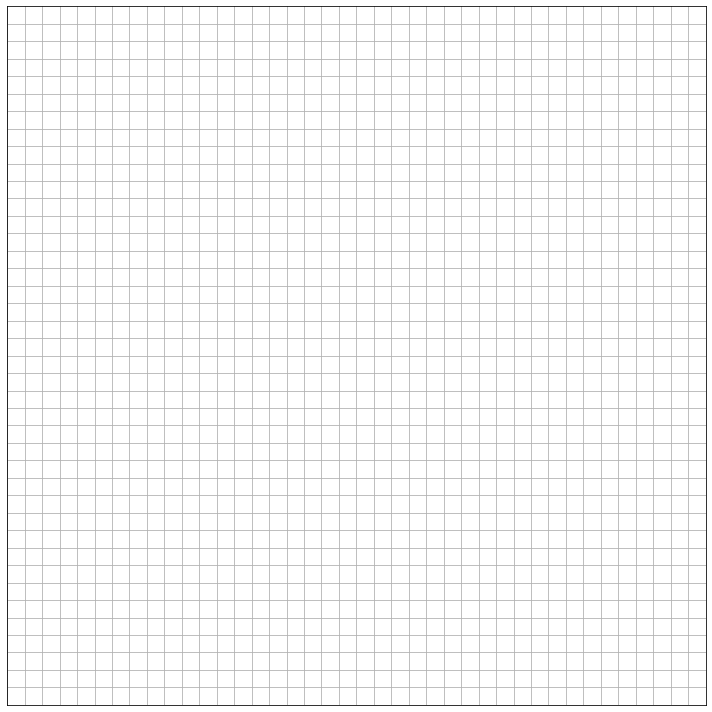

In [21]:
#customizing figure and axes and setting up grid
fig = plt.figure(figsize = (10,10))
ax = plt.subplot(111, 
                 xlim = (0,40), ylim = (0,40), 
                 autoscale_on = False ,
                 xticks = np.arange(0,40,1), yticks = np.arange(0,40,1))
ax.grid()



line1, = ax.plot([],[], '-k', lw = 1,)
line2, = ax.plot([],[], '-k', lw = 1)
line3, = ax.plot([],[], '-k', lw = 1) 
line4, = ax.plot([],[], '-k', lw = 1)
line5, = ax.plot([],[], '-k', lw = 1)
line6, = ax.plot([],[], '-k', lw = 1)

ax.tick_params(axis = "both", which = "both",
               bottom = False, left = False,
              labelbottom = False, labelleft = False)

p1, = ax.plot([],[], 'o',  color = 'red')
p2, = ax.plot([],[], 'o',  color = 'sandybrown')
p3, = ax.plot([],[], 'o',  color = 'yellowgreen') 
p4, = ax.plot([],[], 'o',  color = 'dodgerblue')


#removing x and y tick labels
ax.tick_params(axis = "both", which = "both",
               bottom = False, left = False,
              labelbottom = False, labelleft = False)
plt.tight_layout()

def animate(i,lines,k):
    coordinates = []
    for l in lines.values():
        coordinates.append(list(l.values()))
    x,y = np.array(coordinates).T
    
    
    x,y = np.array(coordinates[0]).T
    line1.set_data(x,y)
    x,y = np.array(coordinates[1]).T
    line2.set_data(x,y)
    x,y = np.array(coordinates[2]).T
    line3.set_data(x,y)
    x,y = np.array(coordinates[3]).T
    line4.set_data(x,y)
    x,y = list(np.array(coordinates[4]).T)
    line5.set_data(x,y)
    x,y = list(np.array(coordinates[5]).T)
    line6.set_data(x,y)
    
    A = [l[1] for l in lines.values()]
    B = [l[2] for l in lines.values()]
    C = [l[3] for l in lines.values()]
    D = [l[4] for l in lines.values()]
    
    x,y = np.array(A).T
    p1.set_data(x,y)
    x,y = np.array(B).T
    p2.set_data(x,y)
    x,y = np.array(C).T
    p3.set_data(x,y)
    x,y = np.array(D).T
    p4.set_data(x,y)
    
    ax.set_title(f'Moves = {i}     Energy = {energy(lines,k)}    Interaction Energy = {k}')
    
    return line1,line2,line3,line4, line5, line6

## Simulating

In [9]:
def simulation(k, iterations):
    lines  = reset()
    Energies = []
    for i in tqdm (range(iterations),
                  desc = 'Progress',
                  ascii = False, ncols = 75):
        lines,e = metropolis(lines,k)
        Energies.append(e)
    animate(i+1,lines,k);
    Energies = np.array(Energies)
    p = sns.relplot(kind = 'line', data = Energies, color = 'red', aspect = 2)
    p.set_axis_labels('Iterations', ' Energy')
    lines = reset()

In [22]:
for e in [-1, -3, -5]:
    for iteration in range(1):
        simulation(-e,10*5)
        fig.savefig(f'/Users/Pradhyumn/Documents/Academics/Biophyscical Chem/ABAB/{e} lattice {iteration + 1}')
        plt.savefig(f'/Users/Pradhyumn/Documents/Academics/Biophyscical Chem/ABAB/{e} graph {iteration + 1}',bbox_inches = 'tight', dpi = 300)
        plt.close()

Progress: 100%|██████████████████████████| 50/50 [00:00<00:00, 4606.59it/s]


## Run this only to reset the protein

In [11]:
# Avoid running this, it will make the iterations slower, this is just for visually resetting the lattice, the coordinates have already been resetted in the function: simulation
animate(0,lines,-0);